In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<b> Creating XOR Dataset for our MLP 

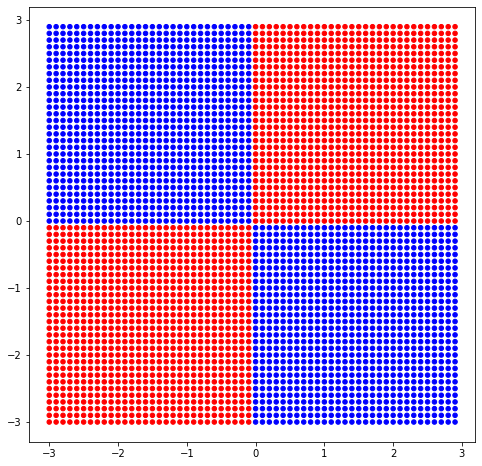

In [131]:

x = np.arange(-3,3,0.1)

xy = []
for i in x:
    for j in x:
        arr = np.array((i,j))
        xy.append(arr)
        
xy = np.array(xy)

z = []
for arr in xy:
    if( ( (arr[0]<0) and (arr[1]>0) )  or ( (arr[0]>0) and (arr[1]<0) ) ):
       z.append(1)
    else:
       z.append(0)

z = np.array(z)  

fig = plt.figure(figsize = (8,8))
colors = ['red' if val == 0 else 'blue' for val in z]
plt.scatter(xy[:,0] , xy[:,1] , s = 20 , color = colors )

## Now Lets design our MLP

### 

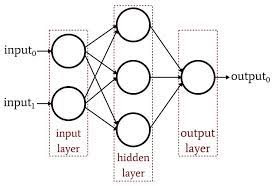

### Our MLP has :-
####   *One hidden Layer with multiple neurons 
####    *One output layer with single neuron 
####    *Our loss function is binary cross entropy
#### *Our Activation function is Sigmoid

In [132]:
##  Initialising parameters of our MLP
def initialise_parameters(input_size,hidden_size, output_size):
    W1 = np.random.randn(hidden_size,input_size)
    b1 = np.zeros((hidden_size,1))
    W2 = np.random.randn(output_size,hidden_size)
    b2 = np.zeros((output_size,1))
    
    parameters = {'W1': W1 , 'b1': b1 , 'W2': W2 , 'b2':b2 }
    return parameters

parameters = initialise_parameters(2,3,1)
# parameters

In [63]:
## Activation function
def activation_function(z):
    return 1/(1+ np.exp(-z))

In [133]:
## feeding our train data into our MLP
def forward_feed(parameters,xy):
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    B1 = parameters['b1']
    B2 = parameters['b2']
    
    #the output at first layer is
    Z1 = np.dot(W1 , xy.T) + B1
    # the output after applying activation function is
    O1 = activation_function(Z1)
    
    #the output at Second layer layer is
    Z2 = np.dot(W2 , O1) + B2
    # the output after applying activation function is
    O2 = activation_function(Z2)
    
    intermediate_results = {'Z1' : Z1 , 'O1' : O1 , 'Z2' : Z2 , 'O2' : O2}
    
    return O2,intermediate_results

O2,intermediate_results = forward_feed(parameters , xy)
#intermediate_results

In [134]:
# Binary cross entropy
def loss(z,O2):
    n = z.shape[0]
    
    return (-1/n)* (np.sum(z*np.log(O2) + (1-z)*np.log(1-O2)))

# loss(z,intermediate_results['O2'])

### SGD

In [137]:
#Backpropogation and calculating gradients
def backward_propagation(parameters, intermediate_results,xy , z):
    #parameters
    n = z.shape[0]
    W1 = parameters["W1"]
    W2 = parameters['W2']
    B1 = parameters['b1']
    B2 = parameters['b2']
    
#     intermediate results
    Z1 = intermediate_results['Z1']
    Z2 = intermediate_results['Z2']
    O1 = intermediate_results['O1']
    O2 = intermediate_results['O2']
    
    #now we need to compute gradients dL/dW2 , dL/dw1 , dL/dB1 , dl,dB2
    #dl/dW2 =  dL/dO2 * dO2/dZ2 * dZ2/dW2
    #dL/dW1 =  dL/dO2 * dO2/dZ2 * dZ2/dO1 * dO1/dZ1 * dZ1/dW1
    
    #dl/dB2 = dl/dO2 * dO2/dZ2 * dZ2/dB2
    #dl/dB1 = dl/dO2 * dO2/dZ2 * dZ2/dO1 * dO1/dZ1 * dZ1/dB1
    
    dO2 = -(z/O2) + ((1-z)/(1-O2))
    
    dZ2 = dO2 * (O2 * (1-O2))
    
    dW2 = (1/n) * np.dot(dZ2, O1.T)
    db2 = (1/n) * np.sum(dZ2, axis=1, keepdims=True)
    
    dO1 = np.dot(W2.T, dZ2)
    dZ1 = dO1 * (O1 * (1-O1))
    
    # compute the derivative of the weights and biases of the hidden layer
    dW1 = (1/n) * np.dot(dZ1, xy)
    db1 = (1/n) * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return gradients
    
    
    

In [138]:
# updating parameters using gradients
def update_parameters(parameters, gradients, learning_rate):
    # retrieve the gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    # retrieve the weights and biases
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # update the weights and biases
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [139]:
#splitting our dataset into train and test
xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size=0.25, random_state=42)

In [140]:
# training our MLP on train dataset
def train(xy, z, hidden_layer_size, num_iterations, learning_rate):
    # initialize the weights and biases
    parameters = initialise_parameters(xy.shape[1], hidden_layer_size, 1)
    
    for i in range(num_iterations):
        # forward propagation
        O2, intermediate_results = forward_feed(parameters,xy)
        
        # compute the loss
        model_loss = loss(z,O2)
        
        # backward propagation
        gradients = backward_propagation(parameters, intermediate_results, xy, z)
        
        # update the parameters
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        if i % 1000 == 0:
            print(f"iteration {i}: loss = {model_loss}")
    
    return parameters

parameters = train(xy_train, z_train, hidden_layer_size=4, num_iterations=10000, learning_rate=0.2)

iteration 0: loss = 0.7746813347306961
iteration 1000: loss = 0.31097019333402964
iteration 2000: loss = 0.16457549349465003
iteration 3000: loss = 0.1336911471869376
iteration 4000: loss = 0.11980107407133327
iteration 5000: loss = 0.1112982703306848
iteration 6000: loss = 0.10526273428241853
iteration 7000: loss = 0.10059791656647879
iteration 8000: loss = 0.09679389926020268
iteration 9000: loss = 0.09357869523568398


In [141]:
#function to predict test dataset
def predict_test(xy, parameters):
    O2, _ = forward_feed(parameters,xy)
    predictions = (O2 > 0.5).astype(int)
    return np.array(predictions).flatten()

predictions = predict_test(xy_test, parameters)

In [142]:
#our accuracy function
def accuracy(z_test,predictions):
    correct = 0
    n = z_test.shape[0]
    for i in range(n):
        if z_test[i]==predictions[i]:
            correct+=1
    
    return (correct*100)/n
        

In [143]:
print(f"Accuracy of the model is = {accuracy(z_test,predictions)}")


Accuracy of the model is = 99.22222222222223


## Lets visualise the performance of the model

In [145]:
#function to visualise model performance
def model_plot(xy_test,z_test,predictions):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
    colors = ['red' if val == 0 else 'blue' for val in z_test]
    plt.scatter(xy_test[:,0] , xy_test[:,1] , s = 20 , color = colors )
    plt.title('Original_Dataset')
    plt.xlabel('xy_test')
    plt.ylabel('z_test')
    plt.legend()

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
    colors = ['red' if val == 0 else 'blue' for val in predictions]
    plt.scatter(xy_test[:,0] , xy_test[:,1] , s = 20 , color = colors )
    plt.title('Predicted_Dataset')
    plt.xlabel('xy_test')
    plt.ylabel('predictions')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


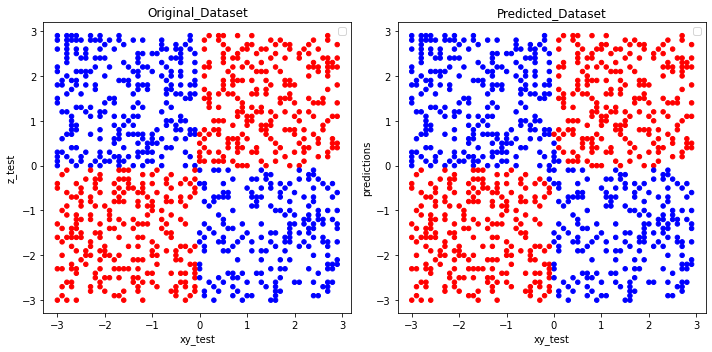

In [146]:
model_plot(xy_test,z_test,predictions)

<b>We can see that the model is performing very good. Lets slightly tune the parameters and see how the performance changes

iteration 0: loss = 0.8786167457843899
iteration 1000: loss = 0.5502183336601112
iteration 2000: loss = 0.39898237197305325
iteration 3000: loss = 0.3726824749749085
iteration 4000: loss = 0.3649182001720635
iteration 5000: loss = 0.3568318299490523
iteration 6000: loss = 0.32663844339601783
iteration 7000: loss = 0.2797934203317952
iteration 8000: loss = 0.2420679440274672
iteration 9000: loss = 0.22410916232033926
iteration 10000: loss = 0.21473737202812343
iteration 11000: loss = 0.20865918129812153
iteration 12000: loss = 0.20414877269298673
iteration 13000: loss = 0.20050174246116595
iteration 14000: loss = 0.19738590631435254
iteration 15000: loss = 0.19462878684888504
iteration 16000: loss = 0.19213378801424158
iteration 17000: loss = 0.18984297969486869
iteration 18000: loss = 0.18771921582726503
iteration 19000: loss = 0.18573704506017524
iteration 20000: loss = 0.1838778931917392
iteration 21000: loss = 0.182127427462907
iteration 22000: loss = 0.1804740779436523
iteration 23

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy of the model is = 93.22222222222223


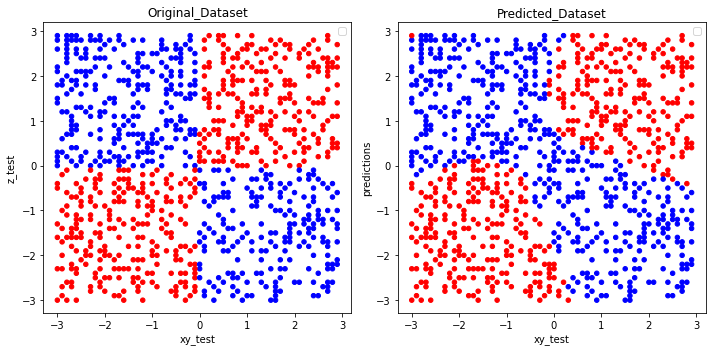

In [147]:
parameters = train(xy_train, z_train, hidden_layer_size=3, num_iterations=50000, learning_rate=0.1)
predictions = predict_test(xy_test, parameters)
print(f"Accuracy of the model is = {accuracy(z_test,predictions)}")
model_plot(xy_test,z_test,predictions)

<B>Lets see one more variation 

iteration 0: loss = 0.7257579162668634
iteration 1000: loss = 0.4478391527393582
iteration 2000: loss = 0.26748551206746907
iteration 3000: loss = 0.1992959513617882
iteration 4000: loss = 0.16798519891908253
iteration 5000: loss = 0.15080100727197518
iteration 6000: loss = 0.13985101203096945
iteration 7000: loss = 0.1321156412170445
iteration 8000: loss = 0.12625111144086767
iteration 9000: loss = 0.12157774146335279
iteration 10000: loss = 0.11771571050676898
iteration 11000: loss = 0.11443560655411543
iteration 12000: loss = 0.1115900656974322
iteration 13000: loss = 0.10907963549813134
iteration 14000: loss = 0.1068344627469998
iteration 15000: loss = 0.10480386303179308
iteration 16000: loss = 0.10295006582070235
iteration 17000: loss = 0.10124429155095804
iteration 18000: loss = 0.09966419350129457
iteration 19000: loss = 0.09819213288587653
iteration 20000: loss = 0.09681398244090471
iteration 21000: loss = 0.09551827676666806
iteration 22000: loss = 0.0942955969444031
iteratio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy of the model is = 98.11111111111111


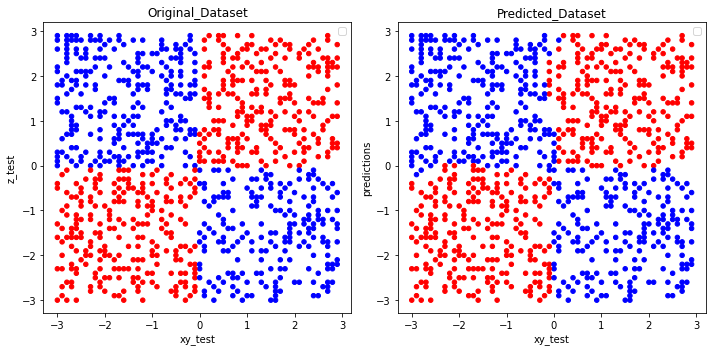

In [149]:
parameters = train(xy_train, z_train, hidden_layer_size=4, num_iterations=25000, learning_rate=0.1)
predictions = predict_test(xy_test, parameters)
print(f"Accuracy of the model is = {accuracy(z_test,predictions)}")
model_plot(xy_test,z_test,predictions)

<b> Lets see what happens when we use 5 neurons in our hidden layer

iteration 0: loss = 0.8087960768420311
iteration 1000: loss = 0.5252011335576777
iteration 2000: loss = 0.26863724229248087
iteration 3000: loss = 0.18635095890023085
iteration 4000: loss = 0.15557495605206936
iteration 5000: loss = 0.13907144771799762
iteration 6000: loss = 0.1285119991892379
iteration 7000: loss = 0.12104903515821062
iteration 8000: loss = 0.11541637323189508
iteration 9000: loss = 0.11095690676929841
iteration 10000: loss = 0.10729437772869906
iteration 11000: loss = 0.10419801022671443
iteration 12000: loss = 0.10151838665749142
iteration 13000: loss = 0.09915393009125885
iteration 14000: loss = 0.0970321378522418
iteration 15000: loss = 0.0950989293682344
iteration 16000: loss = 0.0933135416331698
iteration 17000: loss = 0.09164734346941758
iteration 18000: loss = 0.09008313309695064
iteration 19000: loss = 0.08861155920022215
iteration 20000: loss = 0.08722609026670385
iteration 21000: loss = 0.08591982013858526
iteration 22000: loss = 0.08468417228894787
iterati

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy of the model is = 98.33333333333333


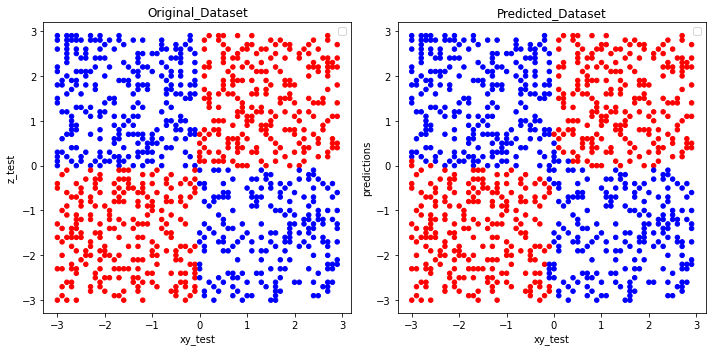

In [150]:
parameters = train(xy_train, z_train, hidden_layer_size=5, num_iterations=25000, learning_rate=0.1)
predictions = predict_test(xy_test, parameters)
print(f"Accuracy of the model is = {accuracy(z_test,predictions)}")
model_plot(xy_test,z_test,predictions)

<b> Lets see how our model behaves when we use 10 neurons in our hidden layer.

iteration 0: loss = 1.367578900684759
iteration 1000: loss = 0.2777306911281641
iteration 2000: loss = 0.18200954899441427
iteration 3000: loss = 0.14582218437363886
iteration 4000: loss = 0.12662898827864483
iteration 5000: loss = 0.11443468019144815
iteration 6000: loss = 0.1058472616913607
iteration 7000: loss = 0.0993884230413254
iteration 8000: loss = 0.09429204373770884
iteration 9000: loss = 0.09011324933718766
iteration 10000: loss = 0.08657306434892074
iteration 11000: loss = 0.08348600689943196
iteration 12000: loss = 0.08072420793596266
iteration 13000: loss = 0.07819948369706381
iteration 14000: loss = 0.07585107110423238
iteration 15000: loss = 0.0736342792745499
iteration 16000: loss = 0.07151310924807869
iteration 17000: loss = 0.06945813715728143
iteration 18000: loss = 0.06744669687223341
iteration 19000: loss = 0.0654644248647491
iteration 20000: loss = 0.06351048168379128
iteration 21000: loss = 0.06160155899334573
iteration 22000: loss = 0.059766093022607325
iterati

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy of the model is = 99.66666666666667


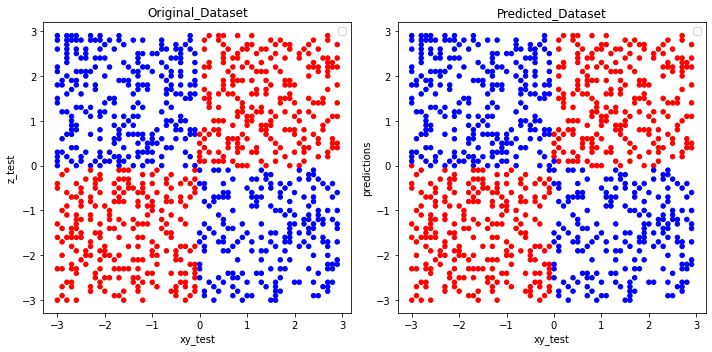

In [151]:
parameters = train(xy_train, z_train, hidden_layer_size=10, num_iterations=50000, learning_rate=0.1)
predictions = predict_test(xy_test, parameters)
print(f"Accuracy of the model is = {accuracy(z_test,predictions)}")
model_plot(xy_test,z_test,predictions)